# Object Detection Using Faster R-CNN

## Clone the Repository

In [2]:
!ls -l

total 114352
-rw-r--r--  1 root root   7238742 May  9 02:58 Faster_R-CNN_gesture_fly.ipynb
drwxr-xr-x 14 root root      6144 May  2 02:25 ObjectDetection-FasterRCNN
-rw-r--r--  1 root root   4890099 May 12 05:16 Object_Detection_Using_Faster_R-CNN.ipynb
-rw-r--r--  1 root root 104957161 Apr 12 15:15 dataset_42028assg2_24686103.zip


In [6]:
!git clone https://github.com/nabinsharmaUTS/ObjectDetection-FasterRCNN.git

fatal: destination path 'ObjectDetection-FasterRCNN' already exists and is not an empty directory.


In [3]:
# Enter the repo directory.
%cd ObjectDetection-FasterRCNN/

/root/assignment_2_F_RCC/ObjectDetection-FasterRCNN


In [4]:
# Install the Requirements
!pip install -r requirements.txt

  Using cached albumentations-1.4.6-py3-none-any.whl.metadata (37 kB)
  Using cached jupyter-1.0.0-py2.py3-none-any.whl.metadata (995 bytes)
  Using cached opencv_python_headless-4.9.0.80-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (20 kB)
  Using cached scikit_image-0.23.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (14 kB)
  Using cached torch-1.12.0-cp310-cp310-manylinux1_x86_64.whl.metadata (22 kB)
  Using cached torchvision-0.13.0-cp310-cp310-manylinux1_x86_64.whl.metadata (10 kB)
  Using cached protobuf-3.20.1-cp310-cp310-manylinux_2_12_x86_64.manylinux2010_x86_64.whl.metadata (698 bytes)
  Using cached wandb-0.17.0-py3-none-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (10 kB)
  Using cached torchinfo-1.8.0-py3-none-any.whl.metadata (21 kB)
  Using cached pycocotools-2.0.7-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (1.1 kB)
  Using cached setuptools-59.5.0-py3-

# Configuring Paths for training, testing and validation datasets

In [5]:
%%writefile data_configs/data_gesture_fly.yaml
# Images and labels direcotry should be relative to train.py
# WRITE YOUR PATH HERE:
TRAIN_DIR_IMAGES: 'data/train'
TRAIN_DIR_LABELS: 'data/train'
VALID_DIR_IMAGES: 'data/valid'
VALID_DIR_LABELS: 'data/valid'
TEST_DIR_IMAGES: 'data/test'
TEST_DIR_LABELS: 'data/test'


# Class names.
# WRITE YOUR CLASSES HERE - DO NOT REMOVE __background__ CLASS:
CLASSES: [
    '__background__',
    'left',
    'right',
    'picture',
    'backward',
    'up',
    'down',
    'land',
    'forward'
]

# Number of classes (object classes + 1 for background class in Faster RCNN).
# WRITE NUMBER OF CLASSES:
NC: 9

# Whether to save the predictions of the validation set while training.
SAVE_VALID_PREDICTION_IMAGES: True

Writing data_configs/data_gesture_fly.yaml


In [5]:
!wandb disabled

W&B disabled.


# Training Faster-RCNN

* --config ./data_configs/custom_data.yaml: This flag specifies the configuration file for the training process. In this case, the configuration file is located at ./data_configs/custom_data.yaml. This contains settings such as data paths, number and names of classes

* --epochs 300: This flag specifies the number of epochs, which is the number of times the entire dataset will be passed forward and backward through the neural network during training. In this case, training will run for 300 epochs.

* --model fasterrcnn_resnet152: This flag indicates the choice of model architecture for training. Here, it specifies the Faster R-CNN architecture with a ResNet-152 backbone. This means that the convolutional layers of ResNet-152 are used as the feature extractor in the Faster R-CNN model.

* --project-name assignment2: This flag specifies the project name or identifier for this training run. It can be used for organizing and tracking different experiments or runs.

* --batch-size 4: This flag sets the batch size, which is the number of data samples processed before the model's parameters are updated during training. The batch size was set to 4, meaning that the training will process 4 samples at a time.


In [ ]:
!python train.py --config ./data_configs/data_gesture_fly.yaml --epochs 50 --model fasterrcnn_resnet50_fpn_v2 --project-name gesture_fly --batch-size 8 --no-mosaic

Not using distributed mode
device cuda
Creating data loaders
Number of training samples: 5194
Number of validation samples: 903

Building model from scratch...
Layer (type:depth-idx)                             Output Shape              Param #
FasterRCNN                                         [100, 4]                  --
├─GeneralizedRCNNTransform: 1-1                    [8, 3, 800, 800]          --
├─BackboneWithFPN: 1-2                             [8, 256, 13, 13]          --
│    └─IntermediateLayerGetter: 2-1                [8, 2048, 25, 25]         --
│    │    └─Conv2d: 3-1                            [8, 64, 400, 400]         (9,408)
│    │    └─BatchNorm2d: 3-2                       [8, 64, 400, 400]         (128)
│    │    └─ReLU: 3-3                              [8, 64, 400, 400]         --
│    │    └─MaxPool2d: 3-4                         [8, 64, 200, 200]         --
│    │    └─Sequential: 3-5                        [8, 256, 200, 200]        (215,808)
│    │    └─Sequenti

In [ ]:
import matplotlib.pyplot as plt
import glob as glob

In [ ]:
!ls -l

total 128
-rw-r--r-- 1 root root  9537 Apr 12 15:44 README.md
-rw-r--r-- 1 root root     0 Apr 12 15:44 __init__.py
-rw-r--r-- 1 root root    25 Apr 12 15:44 _config.yml
drwxr-xr-x 7 root root  6144 May 10 09:13 data
drwxr-xr-x 3 root root  6144 May 10 02:53 data_configs
-rw-r--r-- 1 root root 17612 Apr 12 15:44 datasets.py
-rw-r--r-- 1 root root  8005 May  2 02:25 eval.py
drwxr-xr-x 2 root root  6144 Apr 12 15:44 example_test_data
-rw-r--r-- 1 root root  7324 Apr 12 15:44 inference.py
-rw-r--r-- 1 root root  7956 Apr 12 15:44 inference_video.py
drwxr-xr-x 2 root root  6144 Apr 12 15:45 models
drwxr-xr-x 3 root root  6144 Apr 20 05:55 notebook_examples
drwxr-xr-x 4 root root  6144 Apr 14 03:59 outputs
drwxr-xr-x 2 root root  6144 Apr 12 15:45 readme_images
-rw-r--r-- 1 root root   491 Apr 12 15:45 requirements.txt
drwxr-xr-x 2 root root  6144 Apr 12 15:45 torch_utils
-rw-r--r-- 1 root root 17772 Apr 12 15:45 train.py
drwxr-xr-x 2 root root  6144 Apr 12 15:45 utils
drwxr-xr-x 2 root roo

In [ ]:
results_dir_path = './outputs/training/gesture_fly'
valid_images = glob.glob(f"{results_dir_path}/*.jpg")

In [ ]:
valid_images

['./outputs/training/gesture_fly/image_7_1.jpg',
 './outputs/training/gesture_fly/image_3_1.jpg',
 './outputs/training/gesture_fly/image_1_1.jpg',
 './outputs/training/gesture_fly/image_5_1.jpg',
 './outputs/training/gesture_fly/image_0_1.jpg',
 './outputs/training/gesture_fly/image_4_1.jpg',
 './outputs/training/gesture_fly/image_2_1.jpg',
 './outputs/training/gesture_fly/image_6_1.jpg']

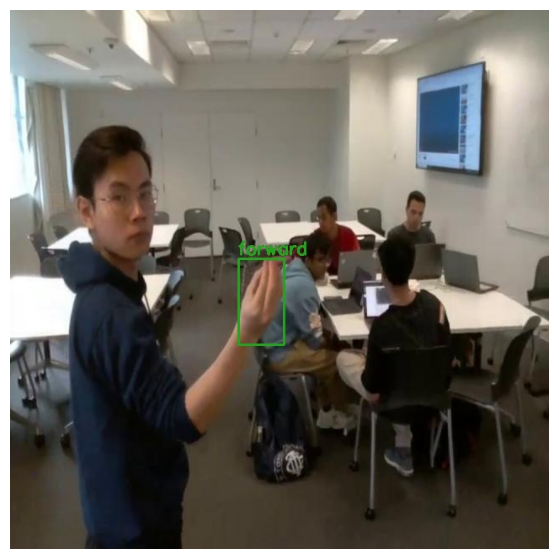

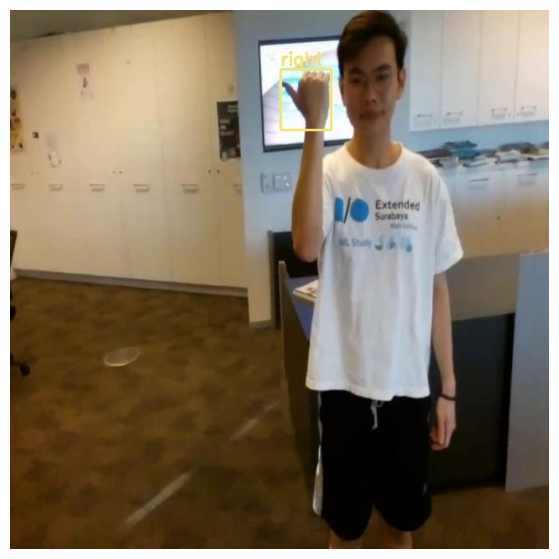

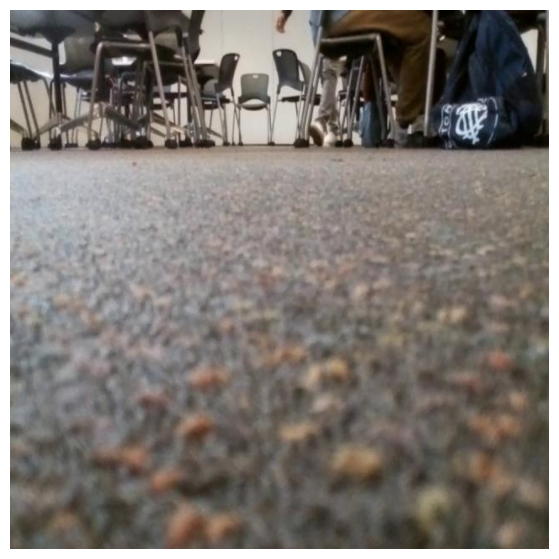

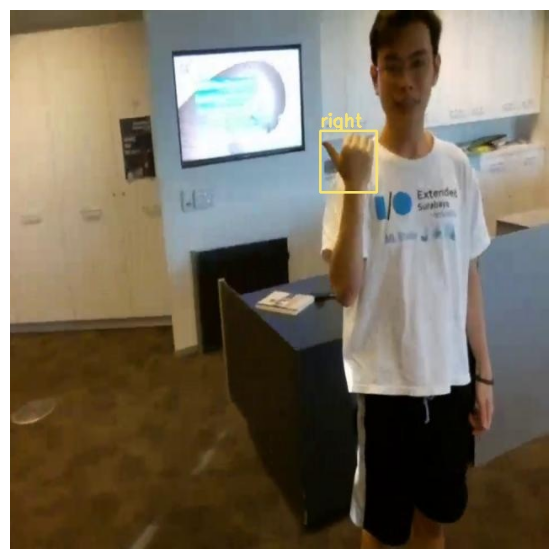

In [ ]:
for i in range(4):
    plt.figure(figsize=(10, 7))
    image = plt.imread(valid_images[i])
    plt.imshow(image)
    plt.axis('off')
    plt.show()

## MAP Validation values per epoch

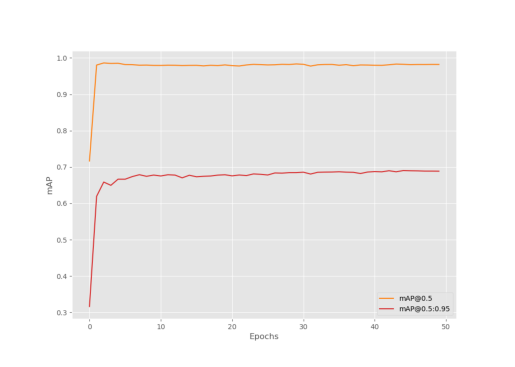

In [27]:
image = plt.imread('./outputs/training/gesture_fly/map.png')
plt.imshow(image)
plt.axis('off')
plt.show()

## Training loss bounding box

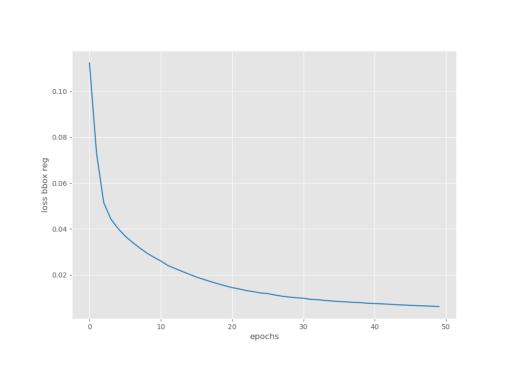

In [ ]:
image = plt.imread('./outputs/training/gesture_fly/train_loss_bbox_reg.png')
plt.imshow(image)
plt.axis('off')
plt.show()

## Training loss classification

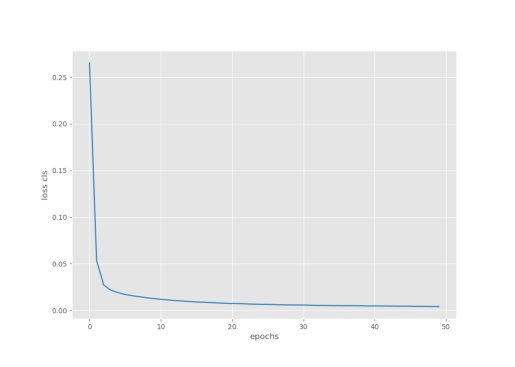

In [ ]:
image = plt.imread('./outputs/training/gesture_fly/train_loss_cls.png')
plt.imshow(image)
plt.axis('off')
plt.show()

## Training general loss 

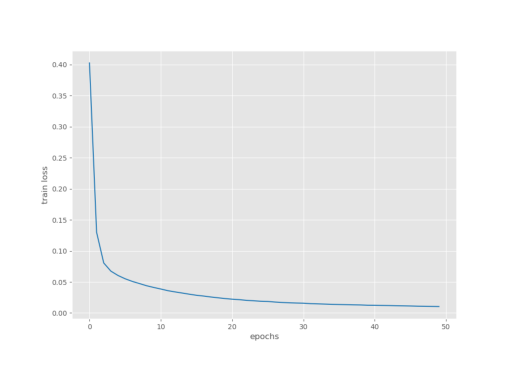

In [ ]:
image = plt.imread('./outputs/training/gesture_fly/train_loss_epoch.png')
plt.imshow(image)
plt.axis('off')
plt.show()

## Training RPN (Region Proposal Network) Loss

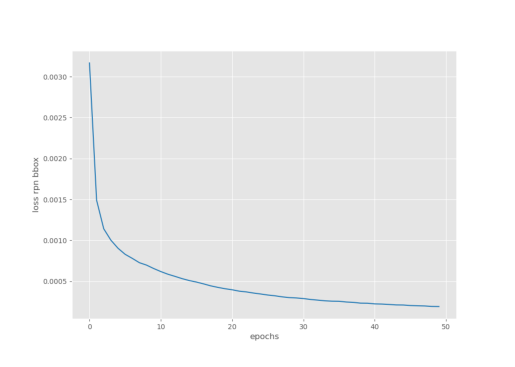

In [ ]:
image = plt.imread('./outputs/training/gesture_fly/train_loss_rpn_bbox.png')
plt.imshow(image)
plt.axis('off')
plt.show()

## Evaluation with Training Dataset

In [ ]:
!python eval.py --weights ./outputs/training/gesture_fly/best_model.pth --config ./data_configs/data_gesture_fly_train.yaml --model fasterrcnn_resnet50_fpn_v2 --verbose

100%|█████████████████████████████████████████| 650/650 [09:56<00:00,  1.09it/s]


{'classes': tensor([1, 2, 3, 4, 5, 6, 7, 8], dtype=torch.int32),
 'map': tensor(0.9792),
 'map_50': tensor(1.),
 'map_75': tensor(1.),
 'map_large': tensor(0.9899),
 'map_medium': tensor(0.9771),
 'map_per_class': tensor([0.9804, 0.9826, 0.9855, 0.9898, 0.9707, 0.9695, 0.9839, 0.9707]),
 'map_small': tensor(0.9546),
 'mar_1': tensor(0.9858),
 'mar_10': tensor(0.9880),
 'mar_100': tensor(0.9880),
 'mar_100_per_class': tensor([0.9879, 0.9898, 0.9915, 0.9947, 0.9834, 0.9825, 0.9912, 0.9832]),
 'mar_large': tensor(0.9939),
 'mar_medium': tensor(0.9865),
 'mar_small': tensor(0.9639)}


("Classes: ['__background__', 'left', 'right', 'picture', 'backward', 'up', "
 "'down', 'land', 'forward']")


AP / AR per class
-------------------------------------------------------------------------
|    | Class                | AP                  | AR                  |
----------------------------------------------------

## Evaluation with Validation Dataset

In [7]:
!python eval.py --weights ./outputs/training/gesture_fly/best_model.pth --config ./data_configs/data_gesture_fly_val.yaml --model fasterrcnn_resnet50_fpn_v2 --verbose

100%|█████████████████████████████████████████| 113/113 [01:45<00:00,  1.08it/s]


{'classes': tensor([1, 2, 3, 4, 5, 6, 7, 8], dtype=torch.int32),
 'map': tensor(0.6902),
 'map_50': tensor(0.9825),
 'map_75': tensor(0.8382),
 'map_large': tensor(0.7789),
 'map_medium': tensor(0.6702),
 'map_per_class': tensor([0.6624, 0.6555, 0.7598, 0.7769, 0.6291, 0.6068, 0.7511, 0.6801]),
 'map_small': tensor(0.4533),
 'mar_1': tensor(0.7538),
 'mar_10': tensor(0.7543),
 'mar_100': tensor(0.7543),
 'mar_100_per_class': tensor([0.7354, 0.7167, 0.8108, 0.8212, 0.7000, 0.6990, 0.8069, 0.7448]),
 'mar_large': tensor(0.8146),
 'mar_medium': tensor(0.7347),
 'mar_small': tensor(0.4886)}


("Classes: ['__background__', 'left', 'right', 'picture', 'backward', 'up', "
 "'down', 'land', 'forward']")


AP / AR per class
-------------------------------------------------------------------------
|    | Class                | AP                  | AR                  |
--------------------------------------------

## Evaluation with Testing Dataset

In [ ]:
!python eval.py --weights ./outputs/training/gesture_fly/best_model.pth --config ./data_configs/data_gesture_fly.yaml --model fasterrcnn_resnet50_fpn_v2 --verbose

100%|█████████████████████████████████████████| 168/168 [02:35<00:00,  1.08it/s]


{'classes': tensor([1, 2, 3, 4, 5, 6, 7, 8], dtype=torch.int32),
 'map': tensor(0.6715),
 'map_50': tensor(0.9590),
 'map_75': tensor(0.7992),
 'map_large': tensor(0.7622),
 'map_medium': tensor(0.6626),
 'map_per_class': tensor([0.6106, 0.6007, 0.7464, 0.7803, 0.6413, 0.6013, 0.7168, 0.6744]),
 'map_small': tensor(0.3915),
 'mar_1': tensor(0.7417),
 'mar_10': tensor(0.7439),
 'mar_100': tensor(0.7439),
 'mar_100_per_class': tensor([0.6986, 0.7008, 0.7933, 0.8273, 0.7251, 0.6928, 0.7863, 0.7268]),
 'mar_large': tensor(0.8072),
 'mar_medium': tensor(0.7275),
 'mar_small': tensor(0.4546)}


("Classes: ['__background__', 'left', 'right', 'picture', 'backward', 'up', "
 "'down', 'land', 'forward']")


AP / AR per class
-------------------------------------------------------------------------
|    | Class                | AP                  | AR                  |
--------------------------------------------

# Inference In Testing Data

In [10]:
!python inference.py --input ./data/small_test/1.jpg  --weights ./outputs/training/gesture_fly/best_model.pth

Building from model name arguments...
Test instances: 1
Image 1 done...
--------------------------------------------------
TEST PREDICTIONS COMPLETE
Traceback (most recent call last):
  File "/root/assignment_2_F_RCC/ObjectDetection-FasterRCNN/inference.py", line 211, in <module>
    main(args)
  File "/root/assignment_2_F_RCC/ObjectDetection-FasterRCNN/inference.py", line 204, in main
    cv2.destroyAllWindows()
cv2.error: OpenCV(4.9.0) /io/opencv/modules/highgui/src/window.cpp:1266: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvDestroyAllWindows'



In [11]:
!python inference.py --input ./data/small_test/2.jpg --weights ./outputs/training/gesture_fly/best_model.pth

Building from model name arguments...
Test instances: 1
Image 1 done...
--------------------------------------------------
TEST PREDICTIONS COMPLETE
Traceback (most recent call last):
  File "/root/assignment_2_F_RCC/ObjectDetection-FasterRCNN/inference.py", line 211, in <module>
    main(args)
  File "/root/assignment_2_F_RCC/ObjectDetection-FasterRCNN/inference.py", line 204, in main
    cv2.destroyAllWindows()
cv2.error: OpenCV(4.9.0) /io/opencv/modules/highgui/src/window.cpp:1266: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvDestroyAllWindows'



In [12]:
!python inference.py --input ./data/small_test/3.jpg  --weights ./outputs/training/gesture_fly/best_model.pth

Building from model name arguments...
Test instances: 1
Image 1 done...
--------------------------------------------------
TEST PREDICTIONS COMPLETE
Traceback (most recent call last):
  File "/root/assignment_2_F_RCC/ObjectDetection-FasterRCNN/inference.py", line 211, in <module>
    main(args)
  File "/root/assignment_2_F_RCC/ObjectDetection-FasterRCNN/inference.py", line 204, in main
    cv2.destroyAllWindows()
cv2.error: OpenCV(4.9.0) /io/opencv/modules/highgui/src/window.cpp:1266: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvDestroyAllWindows'



In [13]:
!python inference.py --input ./data/small_test/4.jpg  --weights ./outputs/training/gesture_fly/best_model.pth

Building from model name arguments...
Test instances: 1
Image 1 done...
--------------------------------------------------
TEST PREDICTIONS COMPLETE
Traceback (most recent call last):
  File "/root/assignment_2_F_RCC/ObjectDetection-FasterRCNN/inference.py", line 211, in <module>
    main(args)
  File "/root/assignment_2_F_RCC/ObjectDetection-FasterRCNN/inference.py", line 204, in main
    cv2.destroyAllWindows()
cv2.error: OpenCV(4.9.0) /io/opencv/modules/highgui/src/window.cpp:1266: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvDestroyAllWindows'



In [14]:
!python inference.py --input ./data/small_test/5.jpg  --weights ./outputs/training/gesture_fly/best_model.pth

Building from model name arguments...
Test instances: 1
Image 1 done...
--------------------------------------------------
TEST PREDICTIONS COMPLETE
Traceback (most recent call last):
  File "/root/assignment_2_F_RCC/ObjectDetection-FasterRCNN/inference.py", line 211, in <module>
    main(args)
  File "/root/assignment_2_F_RCC/ObjectDetection-FasterRCNN/inference.py", line 204, in main
    cv2.destroyAllWindows()
cv2.error: OpenCV(4.9.0) /io/opencv/modules/highgui/src/window.cpp:1266: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvDestroyAllWindows'



## Original Image

In [16]:
import matplotlib.pyplot as plt

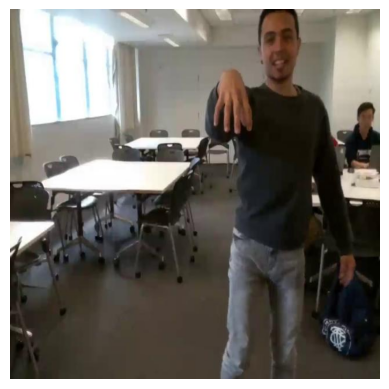

In [17]:
image = plt.imread('./data/small_test/1.jpg')
plt.imshow(image)
plt.axis('off')
plt.show()

## Predictions

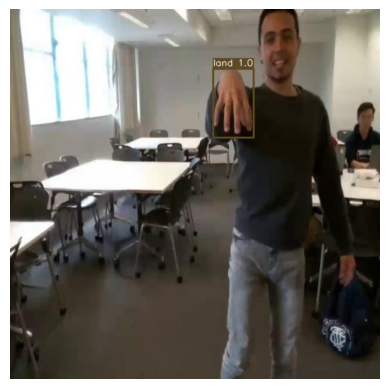

In [18]:
image = plt.imread('./outputs/inference/res_8/1.jpg')
plt.imshow(image)
plt.axis('off')
plt.show()

## Original Image

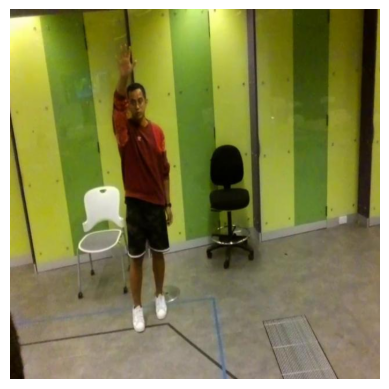

In [19]:
image = plt.imread('./data/small_test/2.jpg')
plt.imshow(image)
plt.axis('off')
plt.show()

## Predictions

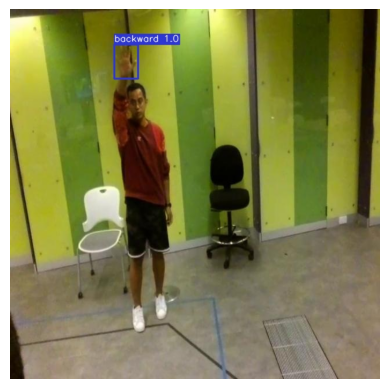

In [20]:
image = plt.imread('./outputs/inference/res_9/2.jpg')
plt.imshow(image)
plt.axis('off')
plt.show()

## Original Image

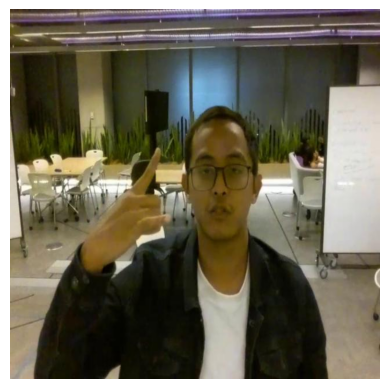

In [21]:
image = plt.imread('./data/small_test/3.jpg')
plt.imshow(image)
plt.axis('off')
plt.show()

## Predictions

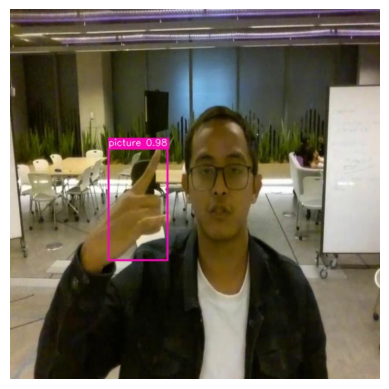

In [22]:
image = plt.imread('./outputs/inference/res_10/3.jpg')
plt.imshow(image)
plt.axis('off')
plt.show()

## Original Image

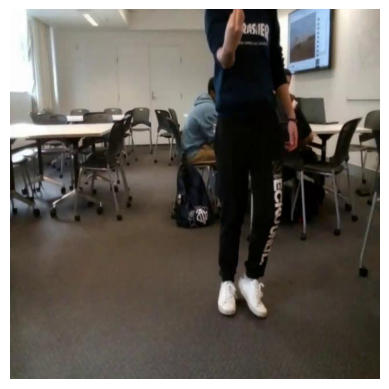

In [23]:
image = plt.imread('./data/small_test/4.jpg')
plt.imshow(image)
plt.axis('off')
plt.show()

## Predictions

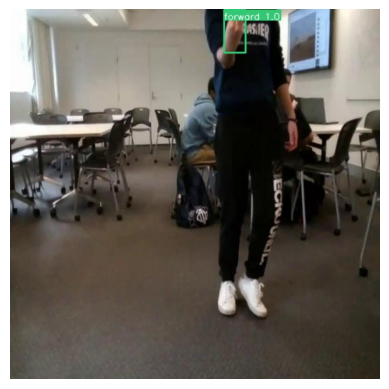

In [24]:
image = plt.imread('./outputs/inference/res_11/4.jpg')
plt.imshow(image)
plt.axis('off')
plt.show()

## Original Image

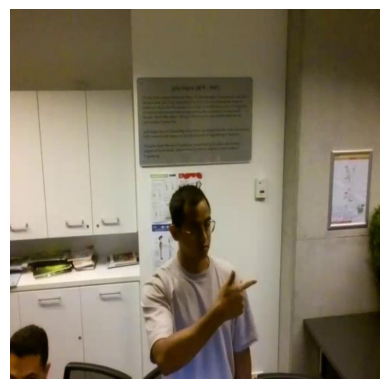

In [25]:
image = plt.imread('./data/small_test/5.jpg')
plt.imshow(image)
plt.axis('off')
plt.show()

## Predictions

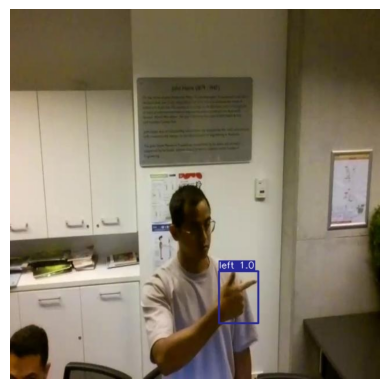

In [26]:
image = plt.imread('./outputs/inference/res_12/5.jpg')
plt.imshow(image)
plt.axis('off')
plt.show()